Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


'A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user\'s questions. USER: <image>\nOutput a JSON with a "caption" that describes the image in less than 6 words and a "prompt", also known as a comma separated list of relevant adjectives and nouns with no grammar as a string. "prompt" is a string. ASSISTANT:'

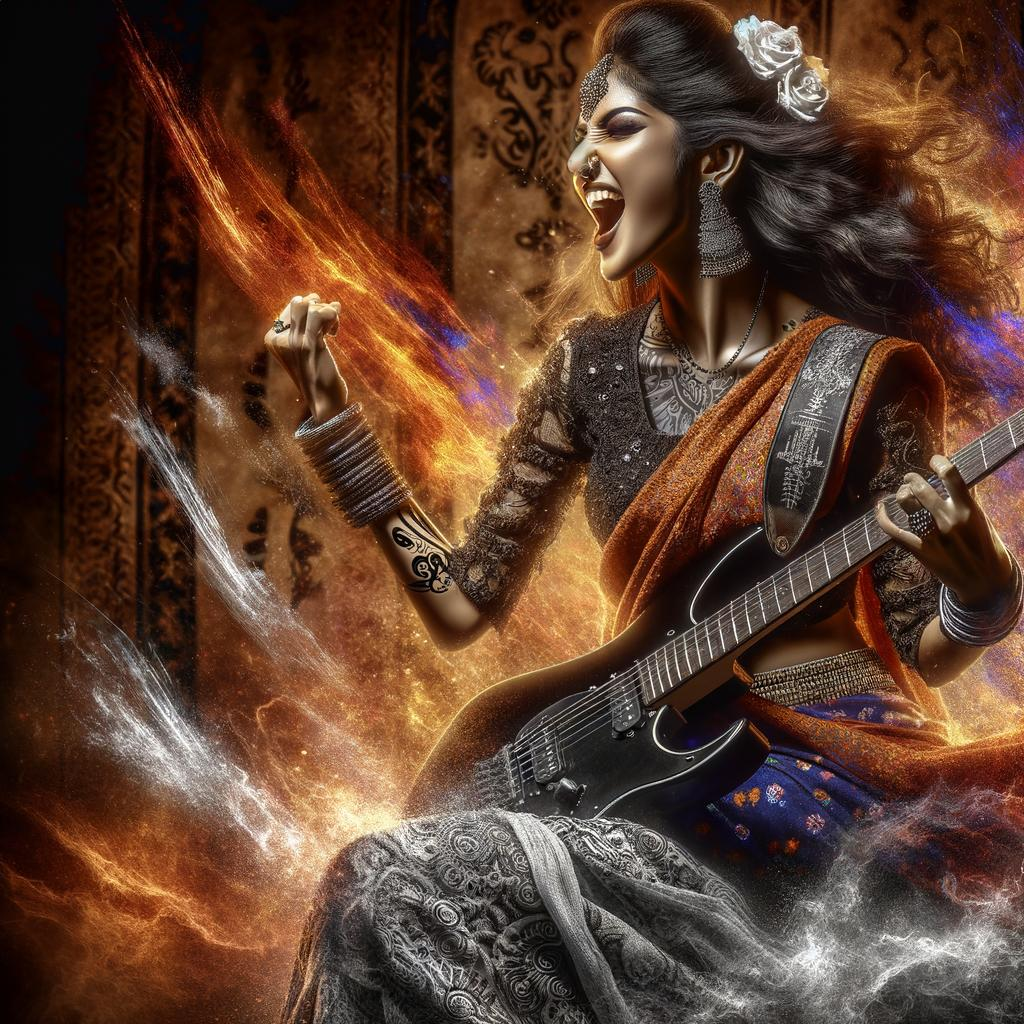

' {\n"caption": "A woman playing a guitar with a flame in the background.",\n"prompt": "woman, guitar, flame, background"\n}'

In [1]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image

torch.set_default_device("cuda")

class Imp():
    def __init__(self, device_map="auto", dtype=torch.float16):
        self.model = AutoModelForCausalLM.from_pretrained(
            "MILVLG/imp-v1-3b", 
            torch_dtype=dtype, 
            device_map=device_map,
            trust_remote_code=True)
        self.tokenizer = AutoTokenizer.from_pretrained("MILVLG/imp-v1-3b", trust_remote_code=True)
    def format(self, prompt):
        return f"A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: <image>\n{prompt} ASSISTANT:"
    def __call__(self, image, formatted_prompt=None, raw_prompt=None):
        if not formatted_prompt:
            if not raw_prompt:
                return None
            formatted_prompt = self.format(raw_prompt)
        display(formatted_prompt, image)
        input_ids = self.tokenizer(formatted_prompt, return_tensors="pt").input_ids
        img = self.model.image_preprocess(image)
        output = self.model.generate(input_ids, images=img, use_cache=True, max_new_tokens=1024)[0]  #do_sample=True, num_beams=5, temperature=0.33, top_p=0.85, top_k=42)
        return self.tokenizer.decode(output[input_ids.shape[1]:], skip_special_tokens=True)
#Set inputs
prompt = "Output a JSON with a \"caption\" that describes the image in less than 6 words and a \"prompt\", also known as a comma separated list of relevant adjectives and nouns with no grammar as a string. \"prompt\" is a string."
image = Image.open("bud.jpg")

imp = Imp()
imp(image, imp.format(prompt))

#input_ids = tokenizer(prompt, return_tensors='pt').input_ids
#image_tensor = model.image_preprocess(image)

##Generate the answer
#output_ids = model.generate(
#    input_ids,
#    max_new_tokens=1024,
#    images=image_tensor,
#    use_cache=True)[0]
#print(tokenizer.decode(output_ids[input_ids.shape[1]:], skip_special_tokens=True).strip())
